# Keras Tutorial Using Wisconsin Breast Cancer Data
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

##### Python 2.7

In [1]:
from keras.models import Sequential  # for input layer
from keras.layers import Dense  # for hidden layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image, display

%matplotlib inline  

Using TensorFlow backend.


In [2]:
#path = "data/ml-20m/"
path = "/Users/1355800/Desktop/DSB/"
model_path = path + 'models/'

In [3]:
# fix random seed for reproducibility
np.random.seed(9)

In [4]:
# 16 NA values in column 6
data = pd.read_csv("wisconsin-breast-cancer.csv", delimiter=",", header=None, na_values="?")
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


#### Attributes
    
    1. Sample code number            id number
    2. Clump Thickness               1 - 10
    3. Uniformity of Cell Size       1 - 10
    4. Uniformity of Cell Shape      1 - 10
    5. Marginal Adhesion             1 - 10
    6. Single Epithelial Cell Size   1 - 10
    7. Bare Nuclei                   1 - 10
    8. Bland Chromatin               1 - 10
    9. Normal Nucleoli               1 - 10
    10. Mitoses                      1 - 10
    11. Class                        (2 for benign, 4 for malignant)

In [5]:
# Fill NA values with the mean of that column
data[6].fillna(data[6].mean(), inplace=True)

In [6]:
data[10].replace([2,4],[0,1],inplace=True)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [7]:
X = data.iloc[:,0:10]
y = data.iloc[:,10] # column 10 contains class (0 for benign, 1 for malignant)

In [8]:
# split train/test (small dataset so only using 10% in test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [9]:
# Save IDs separately
X_train_id = pd.DataFrame({'userID':X_train.iloc[:,0]})
X_test_id = pd.DataFrame({'userID':X_test.iloc[:,0]})

In [10]:
# convert DF into numpy array
X_train = X_train.iloc[:,1:10].values
X_test = X_test.iloc[:,1:10].values

### Example of a Three Layer Neural Network
- Two hidden layers and one output layer (input layer is not included)
- Neurons: 4 + 4 + 1 = 9 neurons
- Weights: [3 x 4] + [4 x 4] + [4 x 1] = 12 + 16 + 1 = 32 weights 
- Biases: 4 + 4 + 1 = 9 biases

[![](https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg)](https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg)

### Neural Network For Breast Cancer Data (Below)

- Input Layer: 9 neurons
- Hidden Layer 1: 12 neurons
- Hidden Layer 2: 8 neurons
- Output Layer: 1 neuron
<br>
<br>
- Activation 1: Rectifier
- Activation 2: Rectifier
- Activation 3: Sigmoid

In [11]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))  # 9 input dimensions, rectifier activation
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid - output is binary
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Sigmoid and ReLU Activation

- ReLU was found to greatly accelerate the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form
    - Best used with lots of data

[![](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


#### Notes
- (9 input layers + 1 connection to bias) * 12 output dimensions = 120 parameters
- (12 dimensions + 1 connection to bias) * 8 output dimensions = 104 parameters
- (8 output dimensions + 1 connection to bias) * 1 output dimension = 9 parameters

In [13]:
# Print weights for first layer

model.layers[0].get_weights()[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

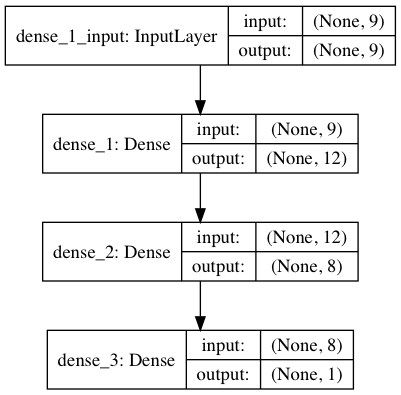

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)
PIL.Image.open('model.png') 

In [15]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=1)

Train on 421 samples, validate on 208 samples
Epoch 1/100
421/421 [==============================] - 0s 863us/step - loss: 1.0785 - acc: 0.3515 - val_loss: 0.8410 - val_acc: 0.3413
Epoch 2/100
421/421 [==============================] - 0s 341us/step - loss: 0.6419 - acc: 0.5083 - val_loss: 0.5440 - val_acc: 0.6875
Epoch 3/100
421/421 [==============================] - 0s 323us/step - loss: 0.4671 - acc: 0.8124 - val_loss: 0.4824 - val_acc: 0.7981
Epoch 4/100
421/421 [==============================] - 0s 666us/step - loss: 0.4059 - acc: 0.8480 - val_loss: 0.4397 - val_acc: 0.8125
Epoch 5/100
421/421 [==============================] - 0s 743us/step - loss: 0.3675 - acc: 0.8741 - val_loss: 0.3908 - val_acc: 0.8365
Epoch 6/100
421/421 [==============================] - 0s 411us/step - loss: 0.3359 - acc: 0.8812 - val_loss: 0.3593 - val_acc: 0.8654
Epoch 7/100
421/421 [==============================] - 0s 368us/step - loss: 0.3066 - acc: 0.9026 - val_loss: 0.3285 - val_acc: 0.8702
Epoch 8/1

Epoch 61/100
421/421 [==============================] - 0s 257us/step - loss: 0.0708 - acc: 0.9786 - val_loss: 0.1776 - val_acc: 0.9423
Epoch 62/100
421/421 [==============================] - 0s 252us/step - loss: 0.0697 - acc: 0.9786 - val_loss: 0.1666 - val_acc: 0.9423
Epoch 63/100
421/421 [==============================] - 0s 268us/step - loss: 0.0679 - acc: 0.9786 - val_loss: 0.1702 - val_acc: 0.9471
Epoch 64/100
421/421 [==============================] - 0s 254us/step - loss: 0.0675 - acc: 0.9786 - val_loss: 0.1734 - val_acc: 0.9423
Epoch 65/100
421/421 [==============================] - 0s 271us/step - loss: 0.0707 - acc: 0.9810 - val_loss: 0.1935 - val_acc: 0.9423
Epoch 66/100
421/421 [==============================] - 0s 295us/step - loss: 0.0680 - acc: 0.9762 - val_loss: 0.1725 - val_acc: 0.9423
Epoch 67/100
421/421 [==============================] - 0s 315us/step - loss: 0.0659 - acc: 0.9786 - val_loss: 0.1675 - val_acc: 0.9471
Epoch 68/100
421/421 [==========================

In [16]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

629/629 [==============================] - 0s 134us/step

acc: 97.14%


In [17]:
# save model weights
model.save_weights(model_path + 'breast_cancer_sys.h5')

In [18]:
model.load_weights(model_path + 'breast_cancer_sys.h5')

### Print Accuracy and Loss

['acc', 'loss', 'val_acc', 'val_loss']


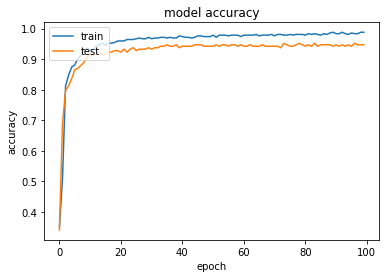

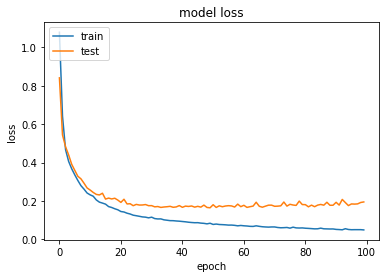

In [19]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Predictions on Test Set

In [20]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[0:5])

[0.0, 0.0, 0.0, 1.0, 0.0]


In [21]:
preds = pd.DataFrame(rounded, columns = ['pred'])

In [22]:
# reset index for concatenation
X_test_id.reset_index(drop=True, inplace=True)

In [23]:
df_pred = pd.concat([X_test_id, preds], axis=1)
df_pred.head()

,userID,pred
0,1193683,0.0
1,1217952,0.0
2,1176187,0.0
3,1192325,1.0
4,733639,0.0


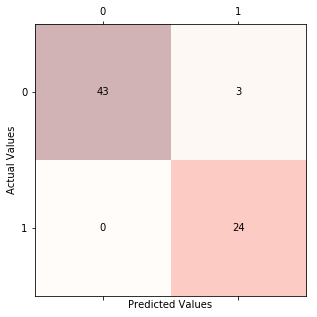

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        46
          1       0.89      1.00      0.94        24

avg / total       0.96      0.96      0.96        70



In [24]:
cm = confusion_matrix(y_test, rounded)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, rounded))